<a href="https://colab.research.google.com/github/donghuna/AI-Expert/blob/main/%5BStudent%2C_Samsung%5D_Day1_1_Simple_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week1: Simple Spam Mail Classifier

## 1. Introduction to NLP

Let's have a taste of NLP by exploring how ChatGPT, which is widely used these days, began the era of Large Language Models.

Using GPT2 to understand how ChatGPT works internally.

## 2. Spam Mail Classifier

Create a spam mail classifier based on what's learned in the lecture.

Building the model in the order presented in the lecture and observing the results.

#### a. Rule-Based Classifier without NLP

Create a classifier using a simple rule without NLP.

#### 0. Evaluation

Evaluate the results of the model created earlier.

#### b. Basic Word Processing!

Enhance the classifier using simple NLP techniques.

#### c. Word Preprocessing

Implementing how to preprocess words according to what's learned in the lecture, so that classification can be as accurate as possible without exceptions.

#### d. Similarity-Based Processing

Further improve the NLP-based model using similarity functions.

## 3. [Extra] Tokenization with BERT

Represent the tokenization from 2-c. as vectors using BERT.

#### Package Download

In [1]:
!pip install --quiet gdown pandas nltk fast-edit-distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.8/115.8 kB 3.2 MB/s eta 0:00:00


In [2]:
# nltk package init for lemmatization, stemming
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 1. Introduction to NLP

Natural Language Processing (NLP) stands at the forefront of modern artificial intelligence, enabling machines to understand, interpret, and generate human language. In this section, we embark on a journey to explore the fundamentals of NLP and its practical applications, with a focus on ChatGPT, one of the most widely used models in the field.

### Understanding the Significance of NLP

NLP has revolutionized various domains, including machine translation, sentiment analysis, question answering systems, and text summarization. Its applications range from enhancing search engines to enabling virtual assistants like Siri and Alexa to interact with users in natural language.

### ChatGPT: A Glimpse into the Era of Large Language Models (LLMs)

We delve into the evolution of NLP with the advent of Large Language Models (LLMs) like ChatGPT. These models, powered by vast amounts of data and advanced neural network architectures such as GPT-2 and GPT-3, have pushed the boundaries of natural language understanding and generation.

### Objectives of the Section

- Introduce the fundamental concepts of NLP.
- Highlight the transformative impact of NLP on various industries.
- Explore the role of ChatGPT in advancing NLP technology.
- Familiarize ourselves with the workings of GPT-2 as a precursor to ChatGPT.

### Key Topics Covered

- Overview of NLP: Basic concepts and applications.
- Evolution of Large Language Models: From GPT-2 to ChatGPT.
- Exploring GPT-2: Understanding its architecture and capabilities.

### Why It Matters

Understanding the basics of NLP and the underlying mechanisms of LLMs like ChatGPT is crucial for anyone venturing into the field of artificial intelligence, data science, or natural language understanding. This section sets the stage for the practical experimentation and model building exercises that follow, laying a solid foundation for further exploration into the exciting realm of NLP.


### Experimenting with GPT2

To gain insights into the workings of ChatGPT, we leverage GPT-2, a precursor to ChatGPT, to explore its internal mechanisms. By understanding how GPT-2 processes text and generates responses, we lay the groundwork for building our own NLP-based solutions in subsequent sections.


In [3]:
# model, tokenization init.
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [4]:
prompt = "GPT2 is a model developed by OpenAI."

In [5]:
# string -> vector
input_ids = tokenizer(prompt, return_tensors="pt").input_ids
input_ids

tensor([[   38, 11571,    17,   318,   257,  2746,  4166,   416,  4946, 20185,
            13]])

In [6]:
tokenizer.decode(11571)

'PT'

In [7]:
# vector -> GPT2 -> vector
gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)
gen_tokens

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[   38, 11571,    17,   318,   257,  2746,  4166,   416,  4946, 20185,
            13,  4946, 20185,   318,   262,  3756,  3298, 22693,   286,  1029,
            12, 26585, 14492,   284,   262,  2276,  3265,   290,   262,   995,
           625,    13,   383,  1486,   290,  7822,   286,   262,   449,  2640,
            44,   357,    41,  1563, 10850, 18252,  4482,     8,   318,  1912,
           319,   257,  1271,   286,  1994,  8514,    11,  1390,   449,  2640,
            44,    11,   262,  4946, 33538,  5888,    11,   449,  1503,   290,
           449,    46,  3069,   357,  4480,  4946, 33538,  1104,   737,   198,
           198,  1890,   517,  1321,   546,  4946, 20185,    11,  3187,  7324,
            13,  9654, 20185,    13,  2398,    13,   198,   198, 19927,    25]])

In [62]:
# vector -> string
gen_text = tokenizer.batch_decode(gen_tokens)[0]
gen_text

'GPT2 is a model developed by OpenAI. OpenAI is the leading global supplier of high-performance computing to the general population and the world over. The design and implementation of the JOSM (Joint Machine Learning System) is based on a number of key technologies, including JOSM, the OpenCV library, JAR and JOLL (with OpenCV support).\n\nFor more information about OpenAI, visit www.openAI.org.\n\nReferences:'

### Experimenting with ChatGPT

We conduct hands-on experiments with ChatGPT to gain practical insights into its capabilities and behavior. By interacting with ChatGPT and observing its responses, we deepen our understanding of its language processing abilities and explore its potential applications in various scenarios.

In [9]:
gpt3_5 = "Close! It’s actually GPT-3, the third iteration of the Generative Pre-trained Transformer model, developed by OpenAI. GPT-2 is the predecessor to GPT-3."

gpt4 = """
Yes, that's correct!
GPT-2, or the second version of the Generative Pre-trained Transformer, is a model developed by OpenAI.
It's an advanced language processing AI model that uses a transformer-based machine learning technique to generate human-like text.
GPT-2 can comprehend and generate coherent and contextually relevant text based on a given prompt, making it useful for a variety of applications like text completion, summarization, and even generating creative writing.
"""

gpt4o = """
GPT-2 is a language model developed by OpenAI. It is part of a family of Generative Pre-trained Transformers (GPT) that use deep learning techniques to generate human-like text based on the input provided. Here are some key points about GPT-2:

Release Date: GPT-2 was introduced by OpenAI in February 2019.
Architecture: It uses a transformer architecture, which is a type of deep learning model designed for sequence-to-sequence tasks, such as translation and text generation.
Training Data: GPT-2 was trained on a diverse dataset of internet text. The dataset is large and varied, enabling the model to generate coherent and contextually relevant text across a wide range of topics.
Size Variants: GPT-2 comes in several size variants, with different numbers of parameters (the weights in the model):
117 million parameters
345 million parameters
762 million parameters
1.5 billion parameters (the largest version)
Capabilities: GPT-2 can perform a variety of natural language processing tasks, such as text completion, translation, summarization, and question answering, without needing task-specific training data.
Controversy and Concerns: Upon its release, there were concerns about the potential misuse of GPT-2, such as generating misleading news or spam. This led OpenAI to initially withhold the full model and release it gradually, starting with smaller versions and finally releasing the full model after thorough evaluation of its impact.
Successor: GPT-2 was succeeded by GPT-3, which is significantly larger and more powerful, with 175 billion parameters. GPT-3 further enhanced the capabilities demonstrated by GPT-2.
Overall, GPT-2 marked a significant advancement in the field of natural language processing and paved the way for subsequent developments in AI language models.
"""

## 2. Spam Mail Classifier

In this section, we focus on building a spam mail classifier using various techniques learned in the lecture. We follow a structured approach to develop and evaluate the classifier's performance, starting from simple rule-based methods to more sophisticated NLP-based models. Through this process, we aim to understand the effectiveness of different approaches in accurately identifying and classifying spam emails.

### Objectives:
- Develop a spam mail classifier based on lecture materials.
- Evaluate classifier performance using different techniques.
- Compare effectiveness of rule-based and NLP-based approaches.

### Key Steps:
1. **Rule-Based Classifier without NLP:** Implement a basic classifier using predefined rules.
2. **Basic Word Processing:** Enhance classifier using simple NLP techniques.
3. **Word Preprocessing:** Implement advanced word preprocessing methods for improved classification.
4. **Similarity-Based Processing:** Further refine classifier using similarity functions and NLP-based techniques.

### Evaluation:
- Assess classifier performance at each stage.
- Compare results to determine effectiveness of different approaches.
- Identify strengths and limitations of rule-based and NLP-based methods.

### Importance:
Developing a spam mail classifier provides practical insights into applying NLP techniques for text classification tasks. This section enables us to understand the challenges involved in spam detection and the role of NLP in addressing them, contributing to our overall understanding of natural language processing applications.

### Prepare Dataset

* Spam Mail Dataset
[Dataset Reference](https://www.kaggle.com/datasets/venky73/spam-mails-dataset?resource=download&SSORegistrationToken=CfDJ8B5GsGLMFaFLm6_4BsA80RS4BAT0LRVbH6iNxvo5aSOHX-1pg5QGq6ge5mtJU8nMIokHC1zedaT2IXaj98xFPqxsKGkKG4FktgUQIoWDCGIz6XGDNs5_0Y4gPevVU07z61T2d0z6mY1g98ljAzOE-DlkPT8k1zBPqyzX_d7yQJMR_49mt5pxs-_6WdFhdSu1B9pFDEnajFKk3QF791dEJp_4ok6NubwwwPyfQQ-O6yBAi9Z9VpkXVBtMIzXMO7_FeAidYdW5uSivFrnz2hmfv0yxmfq-GgNYXfPoAMvasqdAktgKRiFSI-GZATODMfnjFq1q40TDOQu7ZGg8b_9pwx40zhTxCNU9)

In [10]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# download spam/ham dataset
import gdown
from pathlib import Path

url = 'https://drive.google.com/uc?id=1GaUS8wMlWQwqhgCX2wsvhOkQ8_Uw_x2r'
dataset_path = dataset_path = Path('/content/drive/MyDrive/spam_dataset.tsv')
gdown.download(url, str(dataset_path), quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GaUS8wMlWQwqhgCX2wsvhOkQ8_Uw_x2r
To: /content/drive/MyDrive/spam_dataset.tsv
100%|██████████| 5.50M/5.50M [00:00<00:00, 28.6MB/s]


'/content/drive/MyDrive/spam_dataset.tsv'

### Dataset Inspection

In [12]:
import pandas as pd
df = pd.read_csv(dataset_path, sep="\t")

In [13]:
# check how data looks like
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


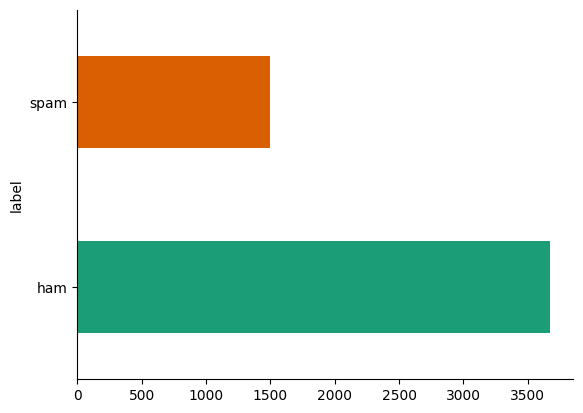

In [14]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
# check types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


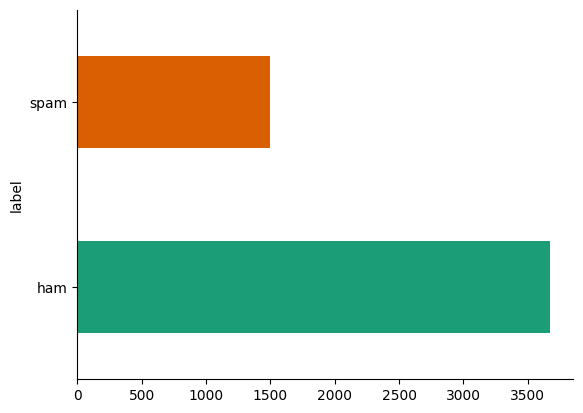

In [16]:
# distribution inspection
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
# text_example
df.iloc[3]["text"]

'Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n'

### a. Rule-Based Classifier without NLP

In this subsection, we begin by implementing a basic spam mail classifier using a rule-based approach without relying on NLP techniques. We define simple rules or criteria based on known characteristics of spam emails, such as **length** of the email. By employing this straightforward method, we aim to establish a baseline for spam classification and evaluate its effectiveness in distinguishing between spam and ham emails.

### Objectives:
- Develop a rule-based classifier for spam mail detection.
- Define rules based on common characteristics of spam emails.

### Key Steps:
1. **Rule Definition:** Identify key features or patterns indicative of spam emails.
2. **Classifier Implementation:** Translate rules into algorithmic logic for classification.


### Importance:
Building a rule-based classifier provides a fundamental understanding of spam detection methods and serves as a benchmark for comparing more sophisticated approaches. This subsection lays the groundwork for exploring advanced NLP techniques in subsequent sections, contributing to our overall understanding of spam mail classification.


In [18]:
# rule definition
length_threshold = 750

df["model_without_nlp"] = df["text"].apply(lambda txt: 1 if len(txt) > length_threshold else 0)
df

,Unnamed: 0,label,text,label_num,model_without_nlp
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0


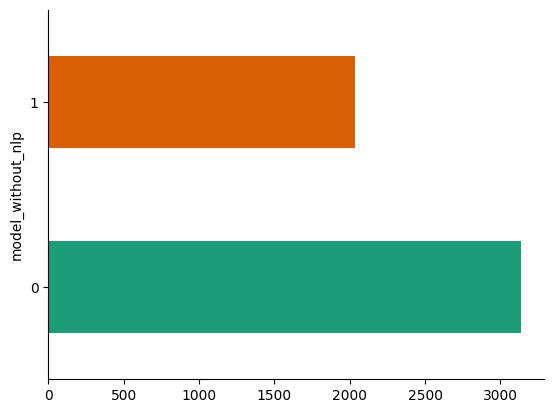

In [19]:
# distribution check
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('model_without_nlp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### b. Evaluation Metrics
Implement followings as function.

#### Precision
Precision quantifies the proportion of correctly classified spam emails out of all emails classified as spam. It is calculated as the ratio of true positives (correctly classified spam emails) to the sum of true positives and false positives (legitimate emails incorrectly classified as spam). Precision helps assess the classifier's ability to avoid misclassifying legitimate emails as spam.

#### Recall
Recall, also known as sensitivity, measures the proportion of correctly classified spam emails out of all actual spam emails. It is calculated as the ratio of true positives to the sum of true positives and false negatives (spam emails incorrectly classified as legitimate). Recall indicates the classifier's ability to identify all instances of spam.

#### F1 Score
The F1 score is the harmonic mean of precision and recall, providing a balanced evaluation metric that considers both false positives and false negatives. It is calculated as the weighted average of precision and recall, with a higher value indicating better overall performance. The F1 score is particularly useful when dealing with imbalanced datasets, where precision and recall may provide conflicting insights.

#### Importance:
Evaluating the classifier using multiple metrics, including F1 score, ensures a comprehensive understanding of its performance across different aspects of classification. By considering precision, recall, and their harmonic mean, we gain insights into the classifier's ability to accurately detect spam while minimizing false positives and false negatives.


In [20]:
from typing import List

def confusion_matrix(reals: List[int], predicts: List[int]):
  tp, fp, fn, tn = 0, 0, 0, 0
  for r_val, p_val in zip(reals, predicts):
    if r_val == 1:
      if p_val == 1:
        tp += 1
      else:
        fn += 1
    else:
      if p_val == 1:
        fp += 1
      else:
        tn += 1
  print(f"total: {tp + fp + fn + tn}")
  return tp, fp, fn, tn

# !!! be aware of zero-division !!!
def precision(tp, fp, fn, tn):
  return tp / (tp + fp) if (tp + fp) != 0 else 0

# !!! be aware of zero-division !!!
def recall(tp, fp, fn, tn):
  return tp / (tp + fn) if (tp + fn) != 0 else 0

# !!! be aware of zero-division !!!
def f1_score(tp, fp, fn, tn):
  p = precision(tp, fp, fn, tn)
  r = recall(tp, fp, fn, tn)
  return 2*p*r / (p + r) if (p + r) != 0 else 0

def print_metrics(tp, fp, fn, tn):
  p = precision(tp, fp, fn, tn)
  r = recall(tp, fp, fn, tn)
  f1 = f1_score(tp, fp, fn, tn)

  print(f"tp: {tp}, fp: {fp}, fn: {fn}, tn: {tn}")
  print(f"precision: {p}, recall: {r}, f1: {f1}")

In [21]:
# evaluation
real_labels = df["label_num"].tolist()
without_nlp_predicts = df["model_without_nlp"].tolist()

print_metrics(*confusion_matrix(real_labels, without_nlp_predicts))

total: 5171
tp: 595, fp: 1442, fn: 904, tn: 2230
precision: 0.2920962199312715, recall: 0.39693128752501666, f1: 0.33653846153846156


### c. Basic Word Processing

In this subsection, we enhance the spam mail classifier by incorporating basic natural language processing (NLP) techniques. By leveraging simple NLP methods, such as tokenization and stemming, we aim to improve the classifier's ability to understand and process textual data. This enhancement allows us to capture more nuanced features of spam emails and refine the classification process for better accuracy and effectiveness.

### Objectives:
- Apply basic NLP techniques to preprocess textual data.
- Enhance the classifier's ability to capture relevant features of spam emails.
- Improve classification accuracy and effectiveness compared to the rule-based approach.

### Key Steps:
1. **Keywords:** Check whether the keyword is in the mail. If the keyword is in the mail filter as spam and otherwise ham.
2. **Regex:** Use regex to catch the keywords.
3. **Edit Distance:**: Utilizing the edit distance to catch some words that is modified.
4. **NLTK**: Use NLTK to improve method 1-3.
  1. **Text Tokenization:** Break down email text into individual tokens or words to facilitate analysis and processing.
  2. **Stemming or Lemmatization:** Reduce words to their root form to standardize vocabulary and improve feature extraction.
  3. **Stopword Removal:** Eliminate common words (stopwords) that carry little semantic meaning to focus on informative content.

### Evaluation:
- Assess classifier performance using the same evaluation metrics as in Section 2-a (Accuracy, Precision, Recall, F1 Score).
- Compare results with the rule-based classifier to measure improvement in classification accuracy and effectiveness.

### Importance:
Incorporating basic NLP techniques enhances the classifier's ability to understand and process textual data, leading to more accurate spam classification. This subsection lays the foundation for exploring advanced NLP methods in subsequent sections, further improving the classifier's performance and contributing to our understanding of text classification tasks.


#### c-1. Keywords
Implement the following logic:
If keyword is in the mail, classify it as spam.

In [22]:
# Keyword Reference: https://lix-it.com/blog/spam-trigger-words/#:~:text=Some%20common%20spam%20trigger%20words,entice%20the%20recipient%20into%20taking
keywords = ['$', '$$$', 'affordable', 'amazing', 'apply', 'bargain', 'bonus', 'buy', 'buy', 'call', 'cards', 'cash', 'cash', 'certified', 'chance', 'cheap', 'clearance', 'click', 'compare', 'credit', 'deal', 'discount', 'fantastic', 'free', 'great', 'instant', 'lowest price', 'marketing solutions', 'no questions asked', 'open', 'order', 'prize', 'sale', 'sales', 'sample', 'satisfaction', 'save', 'sign up', 'solution', 'special ', 'subscribe', 'success', 'trial', 'unlimited', 'win', 'winner', 'act', 'brand', 'congratulations', 'consultation', 'expires', 'free', 'gift', 'guaranteed', 'lifetime', 'limited', 'membership', 'millions', 'new', 'obligation', 'offer', 'offer', 'only', 'order', 'pay', 'percent', 'price', 'promotion', 'rates', 'refund', 'sales', 'satisfaction', 'satisfied', 'supplies', 'trial', 'urgent', 'winner']
keywords = list(set(keywords))
len(keywords)

68

In [23]:
# logic
def keyword_in_text(text):
  for keyword in keywords:
    if keyword in text:
      return 1
  return 0

df["model_rule_based"] = df["text"].apply(lambda txt: keyword_in_text(txt))
df

,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1
...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1


In [24]:
# evaluation
rule_based_predicts = df["model_rule_based"].tolist()

print_metrics(*confusion_matrix(real_labels, rule_based_predicts))

total: 5171
tp: 1246, fp: 2722, fn: 253, tn: 950
precision: 0.31401209677419356, recall: 0.8312208138759173, f1: 0.4558258642765685


#### c-2. Regex



In [25]:
# example of regex
import re

a = re.search("work\D+", "Subject: industrial worksheets", re.IGNORECASE)
a

<re.Match object; span=(20, 30), match='worksheets'>

In [26]:
# logic
def keyword_regex(text):
  for keyword in keywords:
    if re.search(f"{keyword}\D+", text, re.IGNORECASE):
      return 1
  return 0

df["model_regex"] = df["text"].apply(lambda txt: keyword_regex(txt))
df

,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1
...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1


In [27]:
# evaluation
regex_predicts = df["model_regex"].tolist()

print_metrics(*confusion_matrix(real_labels, regex_predicts))

total: 5171
tp: 1352, fp: 2719, fn: 147, tn: 953
precision: 0.3321051338737411, recall: 0.9019346230820547, f1: 0.4854578096947935


#### c-3. Edit Distance

In [28]:
# implementation of edit distance
def edit_distance(str1, str2, m, n):
    # Reference: https://www.geeksforgeeks.org/edit-distance-dp-5/
    # If first string is empty, the only option is to
    # insert all characters of second string into first
    if m == 0:
        return n

    # If second string is empty, the only option is to
    # remove all characters of first string
    if n == 0:
        return m

    # If last characters of two strings are same, nothing
    # much to do. Ignore last characters and get count for
    # remaining strings.
    if str1[m-1] == str2[n-1]:
        return edit_distance(str1, str2, m-1, n-1)

    # If last characters are not same, consider all three
    # operations on last character of first string, recursively
    # compute minimum cost for all three operations and take
    # minimum of three values.
    return 1 + min(
        edit_distance(str1, str2, m, n-1),    # Insert
        edit_distance(str1, str2, m-1, n),    # Remove
        edit_distance(str1, str2, m-1, n-1)    # Replace
    )

In [29]:
# edit distance example
str1 = "GEEXSFRGEEKKS"
#          P  I   R
str2 = "GEEKSFORGEEKS"
print(edit_distance(str1, str2, len(str1), len(str2)))

3


##### Logic for Edit Distance based Filter
1. Split the email into list of words
2. Measure edit distance between each word in email and each keyword.
3. Classify the email with similarity higher than threshold as spam.

In [30]:
# logic
df["words"] = df["text"].apply(lambda txt: list(map(lambda w: w.lower(), txt.split())))
df

,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject:, enron, methanol, ;, meter, #, :, 98..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject:, hpl, nom, for, january, 9, ,, 2001,..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject:, neon, retreat, ho, ho, ho, ,, we, '..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject:, photoshop, ,, windows, ,, office, ...."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject:, re, :, indian, springs, this, deal,..."
...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject:, put, the, 10, on, the, ft, the, tra..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject:, 3, /, 4, /, 2000, and, following, n..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject:, calpine, daily, gas, nomination, >,..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject:, industrial, worksheets, for, august..."


#### Stopword Removal

In [31]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words("english"))

from string import punctuation

PUNCTUATIONS = set(punctuation)

print(list(STOPWORDS)[:10])
print(list(PUNCTUATIONS)[:10])

['mightn', 'itself', 'there', 'isn', 'own', 'them', "weren't", 'but', 'didn', 'he']
['/', ':', '|', '>', '?', '+', ']', ',', '\\', '-']


In [32]:
# logic

def regularize_tokens(tokens: List[str]):
    tokens = [t.strip() for t in tokens]
    tokens = [t.strip("".join(PUNCTUATIONS)) for t in tokens]
    tokens = [t for t in tokens if len(t) > 1]
    tokens = [t for t in tokens if t not in STOPWORDS]
    tokens = [t for t in tokens if t not in PUNCTUATIONS]
    tokens = [t for t in tokens if not re.match(r"^\d+?\.\d+?$", t)]  # e.g., 1.23
    tokens = [t for t in tokens if not re.match(r"^\d+?\,\d+?$", t)]  # e.g., 1,234
    tokens = [t for t in tokens if not t.isnumeric()]  # e.g., 123
    return tokens

In [33]:
# logic
df["words"] = df["words"].apply(lambda ws: regularize_tokens(ws))
df

,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject, enron, methanol, meter, follow, note..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject, hpl, nom, january, see, attached, fi..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject, indian, springs, deal, book, teco, p..."
...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject, put, ft, transport, volumes, decreas..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject, following, noms, hpl, take, extra, m..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject, calpine, daily, gas, nomination, jul..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject, industrial, worksheets, august, acti..."


In [34]:
from fast_edit_distance import edit_distance as f_edit_distance
f_edit_distance("hello", "heello")

1

In [35]:
# logic
import random
from fast_edit_distance import edit_distance as f_edit_distance

from tqdm import tqdm
tqdm.pandas(desc="Measuring edit distance")

# edit distance는 오타일 가능성에 대한 확률을 알려주는것 같음.
# 그래서 보통은 spam내용에서 filter에 걸리지 않도록 단어를 조금씩 바꿔주는데, 이를 해결해줄수있음
# keyword와 edit dist가 높으면 spam일 확률이 높다.
def edit_distance_per_keyword(ws: List[str]):
  # return normalized total sum of edit distance of each word in ws.
  # normalization: consider the length of both keywords and ws.
  distance = 0
  for keyword in keywords:
    for w in ws:
      distance += f_edit_distance(keyword, w)
  return distance / (len(keywords) * len(ws))


df["edit_distance"] = df["words"].progress_apply(lambda txts: edit_distance_per_keyword(txts))
df

Measuring edit distance: 100%|██████████| 5171/5171 [00:22<00:00, 229.13it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject, enron, methanol, meter, follow, note...",6.828748
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject, hpl, nom, january, see, attached, fi...",6.612299
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject, neon, retreat, ho, ho, ho, around, w...",6.723376
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject, photoshop, windows, office, cheap, m...",7.817179
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject, indian, springs, deal, book, teco, p...",6.826065
...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject, put, ft, transport, volumes, decreas...",6.805882
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject, following, noms, hpl, take, extra, m...",6.710670
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject, calpine, daily, gas, nomination, jul...",6.882740
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject, industrial, worksheets, august, acti...",7.416560


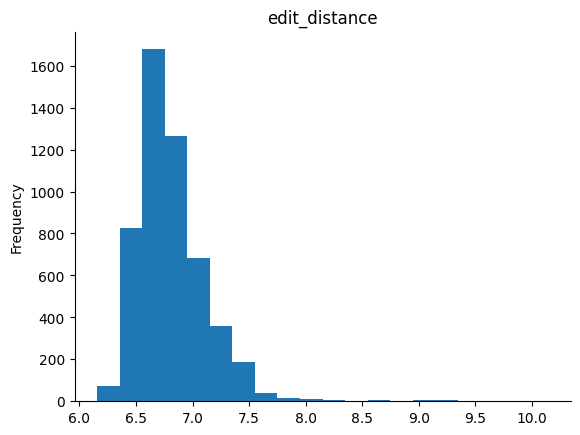

In [36]:
# check distribution
from matplotlib import pyplot as plt
df['edit_distance'].plot(kind='hist', bins=20, title='edit_distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [63]:
# evaluation
edit_distance_threshold = 7
df["model_edit_distance"] = df['edit_distance'] < edit_distance_threshold
edit_distance_predicts = df["model_edit_distance"].tolist()

print_metrics(*confusion_matrix(real_labels, edit_distance_predicts))

TypeError: print_metrics() missing 2 required positional arguments: 'fn' and 'tn'

#### c-4. NLTK
1. Case
2. Lemmatization
3. Stemming

##### Tokenization

In [38]:
from nltk.tokenize import word_tokenize
df["nltk_tokens"] = df["text"].progress_apply(lambda txts: word_tokenize(txts))
def str_lower(ts: List[str]):
  l = []
  for t in ts:
    l.append(t.lower())
  return l

df["nltk_lower_tokens"] = df["nltk_tokens"].progress_apply(lambda txts: str_lower(txts))
df["nltk_words"] = df["nltk_lower_tokens"].progress_apply(lambda txts: regularize_tokens(txts))
df

Measuring edit distance: 100%|██████████| 5171/5171 [00:02<00:00, 2395.60it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance,model_edit_distance,nltk_tokens,nltk_lower_tokens,nltk_words
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject, enron, methanol, meter, follow, note...",6.828748,False,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[subject, enron, methanol, meter, follow, note..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject, hpl, nom, january, see, attached, fi...",6.612299,False,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, hpl, nom, january, see, attached, fi..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject, neon, retreat, ho, ho, ho, around, w...",6.723376,False,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject, photoshop, windows, office, cheap, m...",7.817179,True,"[Subject, :, photoshop, ,, windows, ,, office,...","[subject, :, photoshop, ,, windows, ,, office,...","[subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject, indian, springs, deal, book, teco, p...",6.826065,False,"[Subject, :, re, :, indian, springs, this, dea...","[subject, :, re, :, indian, springs, this, dea...","[subject, indian, springs, deal, book, teco, p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject, put, ft, transport, volumes, decreas...",6.805882,False,"[Subject, :, put, the, 10, on, the, ft, the, t...","[subject, :, put, the, 10, on, the, ft, the, t...","[subject, put, ft, transport, volumes, decreas..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject, following, noms, hpl, take, extra, m...",6.710670,False,"[Subject, :, 3, /, 4, /, 2000, and, following,...","[subject, :, 3, /, 4, /, 2000, and, following,...","[subject, following, noms, hpl, take, extra, m..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject, calpine, daily, gas, nomination, jul...",6.882740,False,"[Subject, :, calpine, daily, gas, nomination, ...","[subject, :, calpine, daily, gas, nomination, ...","[subject, calpine, daily, gas, nomination, jul..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject, industrial, worksheets, august, acti...",7.416560,True,"[Subject, :, industrial, worksheets, for, augu...","[subject, :, industrial, worksheets, for, augu...","[subject, industrial, worksheets, august, acti..."


##### Lemmatization

Lemmatization(어간 추출)은 자연어 처리(NLP)에서 단어의 원형(기본 형태)으로 변환하는 과정  

Examples of lemmatization:

-> rocks : rock

-> corpora : corpus

-> better : good

### Method1: Rule based
Word: “walked”

Rule Application: Remove “-ed”

Result: “walk

### Method2: Dictionary based

‘running’ -> ‘run’

‘better’ -> ‘good’

‘went’ -> ‘go’

### Method3: ML based (NLTK)


In [39]:
# example
# Reference: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [40]:
# logic
from fast_edit_distance import edit_distance as f_edit_distance

from tqdm import tqdm
tqdm.pandas(desc="Lemmatizing...")


def lemmatize(ws: List[str]):
  l = []
  for w in ws:
    l.append(lemmatizer.lemmatize(w))

  return l

df["lemma"] = df["nltk_words"].progress_apply(lambda txts: lemmatize(txts))
df

Lemmatizing...: 100%|██████████| 5171/5171 [00:01<00:00, 3131.16it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance,model_edit_distance,nltk_tokens,nltk_lower_tokens,nltk_words,lemma
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject, enron, methanol, meter, follow, note...",6.828748,False,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject, hpl, nom, january, see, attached, fi...",6.612299,False,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, january, see, attached, fi..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject, neon, retreat, ho, ho, ho, around, w...",6.723376,False,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject, photoshop, windows, office, cheap, m...",7.817179,True,"[Subject, :, photoshop, ,, windows, ,, office,...","[subject, :, photoshop, ,, windows, ,, office,...","[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, office, cheap, ma..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject, indian, springs, deal, book, teco, p...",6.826065,False,"[Subject, :, re, :, indian, springs, this, dea...","[subject, :, re, :, indian, springs, this, dea...","[subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject, put, ft, transport, volumes, decreas...",6.805882,False,"[Subject, :, put, the, 10, on, the, ft, the, t...","[subject, :, put, the, 10, on, the, ft, the, t...","[subject, put, ft, transport, volumes, decreas...","[subject, put, ft, transport, volume, decrease..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject, following, noms, hpl, take, extra, m...",6.710670,False,"[Subject, :, 3, /, 4, /, 2000, and, following,...","[subject, :, 3, /, 4, /, 2000, and, following,...","[subject, following, noms, hpl, take, extra, m...","[subject, following, noms, hpl, take, extra, m..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject, calpine, daily, gas, nomination, jul...",6.882740,False,"[Subject, :, calpine, daily, gas, nomination, ...","[subject, :, calpine, daily, gas, nomination, ...","[subject, calpine, daily, gas, nomination, jul...","[subject, calpine, daily, gas, nomination, jul..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject, industrial, worksheets, august, acti...",7.416560,True,"[Subject, :, industrial, worksheets, for, augu...","[subject, :, industrial, worksheets, for, augu...","[subject, industrial, worksheets, august, acti...","[subject, industrial, worksheet, august, activ..."


##### Stemming

Stemming은 단어의 접미사나 어미를 제거하여 단어의 기본 형태를 찾는 방법입니다. 이는 규칙 기반의 단순한 방법으로, 단어의 어미를 제거함으로써 기본 형태를 추출

In [41]:
# example
# Reference: https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
# import these modules
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [42]:
# logic
from tqdm import tqdm
tqdm.pandas(desc="Stemming...")


def stemming(ws: List[str]):
  return [
      ps.stem(w)
      for w in ws
  ]

df["stems"] = df["lemma"].progress_apply(lambda txts: stemming(txts))
df

Stemming...: 100%|██████████| 5171/5171 [00:08<00:00, 600.06it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance,model_edit_distance,nltk_tokens,nltk_lower_tokens,nltk_words,lemma,stems
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject, enron, methanol, meter, follow, note...",6.828748,False,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject, hpl, nom, january, see, attached, fi...",6.612299,False,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, januari, see, attach, file..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject, neon, retreat, ho, ho, ho, around, w...",6.723376,False,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject, photoshop, windows, office, cheap, m...",7.817179,True,"[Subject, :, photoshop, ,, windows, ,, office,...","[subject, :, photoshop, ,, windows, ,, office,...","[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, office, cheap, ma...","[subject, photoshop, window, offic, cheap, mai..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject, indian, springs, deal, book, teco, p...",6.826065,False,"[Subject, :, re, :, indian, springs, this, dea...","[subject, :, re, :, indian, springs, this, dea...","[subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv...","[subject, indian, spring, deal, book, teco, pv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject, put, ft, transport, volumes, decreas...",6.805882,False,"[Subject, :, put, the, 10, on, the, ft, the, t...","[subject, :, put, the, 10, on, the, ft, the, t...","[subject, put, ft, transport, volumes, decreas...","[subject, put, ft, transport, volume, decrease...","[subject, put, ft, transport, volum, decreas, ..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject, following, noms, hpl, take, extra, m...",6.710670,False,"[Subject, :, 3, /, 4, /, 2000, and, following,...","[subject, :, 3, /, 4, /, 2000, and, following,...","[subject, following, noms, hpl, take, extra, m...","[subject, following, noms, hpl, take, extra, m...","[subject, follow, nom, hpl, take, extra, mmcf,..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject, calpine, daily, gas, nomination, jul...",6.882740,False,"[Subject, :, calpine, daily, gas, nomination, ...","[subject, :, calpine, daily, gas, nomination, ...","[subject, calpine, daily, gas, nomination, jul...","[subject, calpine, daily, gas, nomination, jul...","[subject, calpin, daili, ga, nomin, juli, ment..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject, industrial, worksheets, august, acti...",7.416560,True,"[Subject, :, industrial, worksheets, for, augu...","[subject, :, industrial, worksheets, for, augu...","[subject, industrial, worksheets, august, acti...","[subject, industrial, worksheet, august, activ...","[subject, industri, worksheet, august, activ, ..."


##### Lemmatize and Stem the keywords!

In [43]:
lemmatized_keywords = lemmatize(keywords)
stemmed_keywords = stemming(lemmatized_keywords)
clean_keywords = list(set(stemmed_keywords))
clean_keywords

['pay',
 'no questions ask',
 'order',
 'bonu',
 'prize',
 'satisfi',
 'sale',
 'deal',
 'special ',
 'million',
 'discount',
 'sampl',
 'winner',
 'congratul',
 'afford',
 'sign up',
 'oblig',
 'click',
 'new',
 'fantast',
 'save',
 'bargain',
 'credit',
 'limit',
 'win',
 'onli',
 'price',
 'consult',
 'appli',
 'compar',
 'trial',
 'rate',
 'suppli',
 'expir',
 'subscrib',
 'percent',
 'act',
 'offer',
 'success',
 'cheap',
 'cash',
 'buy',
 'call',
 'chanc',
 'great',
 'certifi',
 'clearanc',
 'satisfact',
 'brand',
 'refund',
 'lifetim',
 'instant',
 'membership',
 'gift',
 'lowest pric',
 'marketing solut',
 'solut',
 '$',
 'free',
 '$$$',
 'promot',
 'urgent',
 'guarante',
 'amaz',
 'card',
 'open',
 'unlimit']

#### c-5. apply NLTK to method c-2, c-3

##### Regex

In [44]:
def clean_keyword_regex(text):
  # copy your logic on section c-2.
  # use clean_keywords instead of keywords
  for keyword in clean_keywords:
    for t in text:
      if re.search(f"{keyword}\D+", t, re.IGNORECASE):
        return 1
  return 0

df["model_clean_regex"] = df["stems"].progress_apply(lambda txt: clean_keyword_regex(txt))
df

Stemming...: 100%|██████████| 5171/5171 [00:17<00:00, 289.08it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance,model_edit_distance,nltk_tokens,nltk_lower_tokens,nltk_words,lemma,stems,model_clean_regex
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject, enron, methanol, meter, follow, note...",6.828748,False,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note...",1
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject, hpl, nom, january, see, attached, fi...",6.612299,False,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, januari, see, attach, file...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject, neon, retreat, ho, ho, ho, around, w...",6.723376,False,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject, photoshop, windows, office, cheap, m...",7.817179,True,"[Subject, :, photoshop, ,, windows, ,, office,...","[subject, :, photoshop, ,, windows, ,, office,...","[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, office, cheap, ma...","[subject, photoshop, window, offic, cheap, mai...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject, indian, springs, deal, book, teco, p...",6.826065,False,"[Subject, :, re, :, indian, springs, this, dea...","[subject, :, re, :, indian, springs, this, dea...","[subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv...","[subject, indian, spring, deal, book, teco, pv...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject, put, ft, transport, volumes, decreas...",6.805882,False,"[Subject, :, put, the, 10, on, the, ft, the, t...","[subject, :, put, the, 10, on, the, ft, the, t...","[subject, put, ft, transport, volumes, decreas...","[subject, put, ft, transport, volume, decrease...","[subject, put, ft, transport, volum, decreas, ...",0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject, following, noms, hpl, take, extra, m...",6.710670,False,"[Subject, :, 3, /, 4, /, 2000, and, following,...","[subject, :, 3, /, 4, /, 2000, and, following,...","[subject, following, noms, hpl, take, extra, m...","[subject, following, noms, hpl, take, extra, m...","[subject, follow, nom, hpl, take, extra, mmcf,...",0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject, calpine, daily, gas, nomination, jul...",6.882740,False,"[Subject, :, calpine, daily, gas, nomination, ...","[subject, :, calpine, daily, gas, nomination, ...","[subject, calpine, daily, gas, nomination, jul...","[subject, calpine, daily, gas, nomination, jul...","[subject, calpin, daili, ga, nomin, juli, ment...",0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject, industrial, worksheets, august, acti...",7.416560,True,"[Subject, :, industrial, worksheets, for, augu...","[subject, :, industrial, worksheets, for, augu...","[subject, industrial, worksheets, august, acti...","[subject, industrial, worksheet, august, activ...","[subject, industri, worksheet, august, activ, ...",1


In [45]:
# previous
# precision: 0.3321051338737411, recall: 0.9019346230820547, f1: 0.4854578096947935
clean_regex_predicts = df["model_clean_regex"].tolist()

print_metrics(*confusion_matrix(real_labels, clean_regex_predicts))

total: 5171
tp: 773, fp: 1336, fn: 726, tn: 2336
precision: 0.3665244191559981, recall: 0.5156771180787192, f1: 0.42849223946784926


##### Edit distance

In [46]:
from tqdm import tqdm
tqdm.pandas(desc="Measuring edit distance")


def clean_edit_distance_per_keyword(ws: List[str]):
  # copy your logic on section c-3.
  # use clean_keywords instead of keywords
  distance = 0
  for keyword in keywords:
    for w in ws:
      distance += f_edit_distance(keyword, w)
  return distance / (len(keywords) * len(ws))

df["clean_edit_distance"] = df["stems"].progress_apply(lambda txts: clean_edit_distance_per_keyword(txts))
df

Measuring edit distance: 100%|██████████| 5171/5171 [00:21<00:00, 242.64it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance,model_edit_distance,nltk_tokens,nltk_lower_tokens,nltk_words,lemma,stems,model_clean_regex,clean_edit_distance
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject, enron, methanol, meter, follow, note...",6.828748,False,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note...",1,6.586338
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject, hpl, nom, january, see, attached, fi...",6.612299,False,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, januari, see, attach, file...",0,6.573529
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject, neon, retreat, ho, ho, ho, around, w...",6.723376,False,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...",0,6.446055
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject, photoshop, windows, office, cheap, m...",7.817179,True,"[Subject, :, photoshop, ,, windows, ,, office,...","[subject, :, photoshop, ,, windows, ,, office,...","[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, office, cheap, ma...","[subject, photoshop, window, offic, cheap, mai...",1,7.191511
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject, indian, springs, deal, book, teco, p...",6.826065,False,"[Subject, :, re, :, indian, springs, this, dea...","[subject, :, re, :, indian, springs, this, dea...","[subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv...","[subject, indian, spring, deal, book, teco, pv...",0,6.549189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject, put, ft, transport, volumes, decreas...",6.805882,False,"[Subject, :, put, the, 10, on, the, ft, the, t...","[subject, :, put, the, 10, on, the, ft, the, t...","[subject, put, ft, transport, volumes, decreas...","[subject, put, ft, transport, volume, decrease...","[subject, put, ft, transport, volum, decreas, ...",0,6.717227
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject, following, noms, hpl, take, extra, m...",6.710670,False,"[Subject, :, 3, /, 4, /, 2000, and, following,...","[subject, :, 3, /, 4, /, 2000, and, following,...","[subject, following, noms, hpl, take, extra, m...","[subject, following, noms, hpl, take, extra, m...","[subject, follow, nom, hpl, take, extra, mmcf,...",0,6.550274
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject, calpine, daily, gas, nomination, jul...",6.882740,False,"[Subject, :, calpine, daily, gas, nomination, ...","[subject, :, calpine, daily, gas, nomination, ...","[subject, calpine, daily, gas, nomination, jul...","[subject, calpine, daily, gas, nomination, jul...","[subject, calpin, daili, ga, nomin, juli, ment...",0,6.563854
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject, industrial, worksheets, august, acti...",7.416560,True,"[Subject, :, industrial, worksheets, for, augu...","[subject, :, industrial, worksheets, for, augu...","[subject, industrial, worksheets, august, acti...","[subject, industrial, worksheet, august, activ...","[subject, industri, worksheet, august, activ, ...",1,6.895460


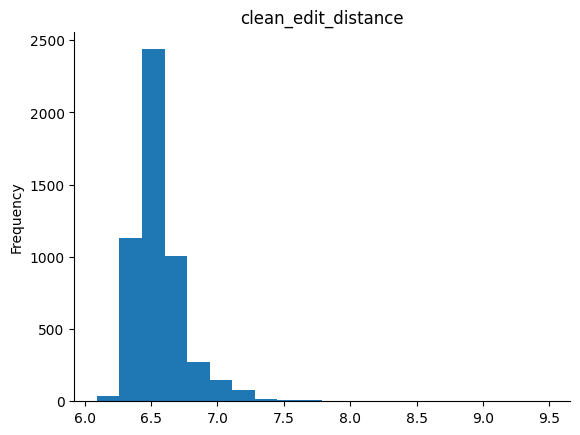

In [47]:
from matplotlib import pyplot as plt
df['clean_edit_distance'].plot(kind='hist', bins=20, title='clean_edit_distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
# previous
# precision: 0.5656108597285068, recall: 0.41694462975316876, f1: 0.4800307219662059

edit_distance_threshold = 6
df["model_clean_edit_distance"] = df['clean_edit_distance'] > edit_distance_threshold
clean_edit_distance_predicts = df["model_clean_edit_distance"].tolist()

print_metrics(*confusion_matrix(real_labels, clean_edit_distance_predicts))

total: 5171
tp: 1499, fp: 3672, fn: 0, tn: 0
precision: 0.2898859021465867, recall: 1.0, f1: 0.4494752623688156


## Implement with scikit-learn!

* In this section we are going to use **counter vectorizer** to build a classifier.


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  -----

In [50]:
# as we are trying to use regression, which requires training, we will split the dataset into train and test.

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df["text"],df["label_num"], test_size=0.2, random_state=10)

In [51]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True)

In [52]:
# build vocabulary with training data and see what's in it.
vectorizer.fit(train_X)
print(vectorizer.get_feature_names_out()[0:20])
print(vectorizer.get_feature_names_out()[-20:])

['00' '000' '0000' '000000' '000000000002858' '000080' '0001' '00018'
 '00020608' '0004' '0005' '0008' '001' '0010' '0012' '002' '0022' '00221'
 '0025' '0027']
['zxgwvpiadobe' 'zxgwvpihere' 'zxgwvpiimg' 'zxgwvpimacromedia'
 'zxgwvpimicrosoft' 'zxgwvpinorton' 'zxjcxz' 'zxklh' 'zxzmcnbf' 'zyban'
 'zykfe' 'zyl' 'zynve' 'zyrtec' 'zyyqywp' 'zzn' 'zzo' 'zzocb' 'zzso'
 'zzsyt']


In [53]:
# vecotrize both train and test with the fit vectorizer
train_X_vector = vectorizer.transform(train_X)
test_X_vector = vectorizer.transform(test_X)

In [54]:
train_X_vector

<4136x44268 sparse matrix of type '<class 'numpy.int64'>'
	with 270704 stored elements in Compressed Sparse Row format>

In [55]:
print(train_X_vector[0].toarray().tolist()[0][:10])

[0, 3, 0, 0, 0, 0, 0, 0, 0, 0]


In [56]:
vectorizer.inverse_transform([[1]])

[array(['00'], dtype='<U24')]

In [57]:
# we are going to use simple model.
# regression model draws a line based on the number of words being mentioned in the mail.

# build a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X_vector, train_y)

LogisticRegression()

In [72]:
y_pred_train = model.predict(train_X_vector)
y_pred_test = model.predict(test_X_vector)

y_pred_train[:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

# training dataset score
print(classification_report(y_pred_train, train_y))
print(confusion_matrix(y_pred_train, train_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00      1205

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136

[[2930    1]
 [   1 1204]]


In [60]:
# test dataset score
print(classification_report(y_pred_test, test_y))
print(confusion_matrix(y_pred_test, test_y))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       729
           1       0.99      0.95      0.97       306

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.98      1035
weighted avg       0.98      0.98      0.98      1035

[[725   4]
 [ 16 290]]
